<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/Heartbeat/heartbeatcategorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
import numpy as np
import pandas as pd 
from google.colab import files 
from keras.models import Sequential as seq
from keras.layers import Dense, Activation,Dropout, Conv1D, Flatten, Reshape
from keras.layers import MaxPooling1D as mp1d
from keras.layers import GlobalMaxPooling1D as gmp1d
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as acc
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#upload
files.upload()

Saving mitbih_train.csv to mitbih_train (1).csv


In [ ]:
testData = pd.read_csv('mitbih_test.csv', header=None)
trainData = pd.read_csv('mitbih_train (1).csv', header=None)
print(testData.shape)
print(trainData.shape)


(21892, 188)
(87554, 188)


In [ ]:
testData = testData.dropna(axis=0)
trainData = trainData.dropna(axis=0)
print(testData.shape)
print(trainData.shape)

(21892, 188)
(87554, 188)


In [ ]:
trainData[187].dtypes

dtype('float64')

In [ ]:
trainData[187] = trainData[187].astype(int)
testData[187] = testData[187].astype(int)

In [ ]:
trainData[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

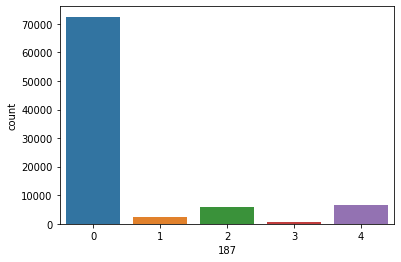

In [ ]:
sns.countplot(x=trainData[187]) 

In [ ]:
#upsampling
t1=trainData[trainData[187]==1]
t2=trainData[trainData[187]==2]
t3=trainData[trainData[187]==3]
t4=trainData[trainData[187]==4]
t0=(trainData[trainData[187]==0]).sample(n=20000,random_state=0)

t1adj=resample(t1,replace=True,n_samples=20000,random_state=1)
t2adj=resample(t2,replace=True,n_samples=20000,random_state=2)
t3adj=resample(t3,replace=True,n_samples=20000,random_state=3)
t4adj=resample(t4,replace=True,n_samples=20000,random_state=4)

trainData=pd.concat([t0,t1adj,t2adj,t3adj,t4adj])

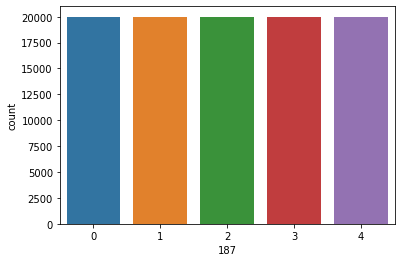

In [ ]:
sns.countplot(x=trainData[187]) 

In [ ]:
trainY = trainData[187]
testY = testData[187]
trainData = trainData.drop(columns=187, axis=1)
testData = testData.drop(columns=187, axis=1)

In [ ]:
trainData = trainData.values
testData = testData.values
trainY = trainY.values
testY = testY.values

In [ ]:
trainData.shape

(100000, 187)

In [116]:
#create 1D Convolutional NN
arch = seq()
arch.add(Reshape((trainData.shape[1], 1), input_shape=(trainData.shape[1],)))
arch.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(trainData.shape[1], 1)))
arch.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
arch.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
arch.add(mp1d(pool_size=3, strides=2))
arch.add(Dropout(0.5)) 
arch.add(Flatten())
arch.add(Dense(512, activation='relu'))
arch.add(Dense(1024, activation='relu')) 
arch.add(Dense(64, activation='relu'))
arch.add(Dense(5, activation='softmax'))
arch.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['acc'])

In [117]:
arch.fit(trainData,trainY, batch_size=256, epochs=16, validation_split = 0.3, shuffle=True)


Epoch 1/16
274/274 [==============================] - 171s 621ms/step - loss: 0.6716 - acc: 0.7194 - val_loss: 9.6664 - val_acc: 0.3179
Epoch 2/16
274/274 [==============================] - 167s 609ms/step - loss: 0.1463 - acc: 0.9471 - val_loss: 15.1001 - val_acc: 0.3308
Epoch 3/16
274/274 [==============================] - 166s 607ms/step - loss: 0.0810 - acc: 0.9713 - val_loss: 15.6523 - val_acc: 0.3267
Epoch 4/16
274/274 [==============================] - 166s 607ms/step - loss: 0.0468 - acc: 0.9842 - val_loss: 15.4940 - val_acc: 0.3325
Epoch 5/16
274/274 [==============================] - 166s 606ms/step - loss: 0.0384 - acc: 0.9869 - val_loss: 20.9589 - val_acc: 0.3325
Epoch 6/16
274/274 [==============================] - 166s 605ms/step - loss: 0.0316 - acc: 0.9894 - val_loss: 17.7979 - val_acc: 0.3297
Epoch 7/16
274/274 [==============================] - 166s 605ms/step - loss: 0.0269 - acc: 0.9907 - val_loss: 21.5214 - val_acc: 0.3325
Epoch 8/16
274/274 [======================

In [118]:
predictions = arch.predict(testData)
answers = predictions.argmax(axis=1)
print(acc(answers, testY)*100,'%')

90.53078750228394 %
